In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from model_equations_separate_NC_sep_vmax import *

In [4]:
import run_sensitivity

In [5]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [DONCOLOR, RDONCOLOR, DINCOLOR,SPCOLOR, SHCOLOR,PCOLOR, HCOLOR, ]
ccnorder = ['DON', 'RDON', 'DIN', 'Sp', 'Sh', 'Bp', 'Bh', ]
cccpalette = [ SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR, PCOLOR, HCOLOR,]
cccorder = ['Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC', 'Bp[C]', 'Bh[C]', ]
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


In [6]:
refdf = pd.read_csv('prelim_bottle.csv')


In [18]:
dpath = r'C:\Users\wosnat\OneDrive - University of Haifa\Documents\results\recycle_model\res'
import glob

res_glob_pattern = '*_df.csv.gz'
sum_glob_pattern = '*_sum.csv.gz'

sum_df = pd.concat ( [ 
    pd.read_csv(f, low_memory=False) for f in glob.glob(os.path.join(dpath,sum_glob_pattern ))
] )
df = pd.concat ( [ 
    pd.read_csv(f, low_memory=False) for f in glob.glob(os.path.join(dpath,res_glob_pattern ))
] )



In [91]:
sum_df['type'] = sum_df.run_id.str.replace('_.*','', regex=True)

In [19]:
sum_df.shape

In [20]:
sum_df.nsmallest(columns='error', n=10)

Unnamed: 0       M_h       M_p  gamma^D_p  gamma^D_h    R_p    R_h  \
926           0  0.000001  0.000001        0.8        0.8  6.625  6.625   
546           0  0.000001  0.000001        0.8        0.8  6.625  6.625   
62            0  0.000001  0.000001        0.8        0.8  6.625  6.625   
103           0  0.000001  0.000001        0.8        0.8  6.625  6.625   
480           0  0.000001  0.000001        0.8        0.8  6.625  6.625   
540           0  0.000001  0.000001        0.8        0.8  6.625  6.625   
54            0  0.000001  0.000001        0.8        0.8  6.625  6.625   
905           0  0.000001  0.000001        0.8        0.8  6.625  6.625   
167           0  0.000001  0.000001        0.8        0.8  6.625  6.625   
695           0  0.000001  0.000001        0.8        0.8  6.625  6.625   

        E^O_p  E^I_p  E^O_h  ...      r0_h   b_p   b_h  \
926  0.000001    0.0    0.0  ...  0.000002  0.01  0.01   
546  0.000001    0.0    0.0  ...  0.000002  0.01  0.01   
62   0.000001    0.0    0.0  ...  0.000002  0.01  0.01   
103  0.000001    0.0    0.0  ...  0.000002  0.01  0.01   
480  0.000001    0.0    0.0  ...  0.000002  0.01  0.01   
540  0.000001    0.0    0.0  ...  0.000002  0.01  0.01   
54   0.000001    0.0    0.0  ...  0.000002  0.01  0.01   
905  0.000001    0.0    0.0  ...  0.000002  0.01  0.01   
167  0.000001    0.0    0.0  ...  0.000002  0.01  0.01   
695  0.000001    0.0    0.0  ...  0.000002  0.01  0.01   

                                     run_id  status       h_err       p_err  \
926   pse4_Vmax^IN_h_18_h-65777870851600903       0  427.406173  165.788707   
546     pse4_K^IN_p_20_h5550858566262168568       0  443.136437  152.564197   
62       pse4_K^IN_h_9_h-907144952032095112       0  443.903668  152.199163   
103      pse3_K^IN_p_2_h4895258542848259320       0  425.379163  174.527918   
480  pse3_Vmax^IN_h_1_h-7513917998685876004       0  418.814692  185.051998   
540      pse4_K^IN_p_21_h102449767300855603       0  418.612337  187.199860   
54       pse4_K^IN_h_8_h-315165028178013400       0  421.410688  186.733348   
905     pse3_K^IN_p_27_h8303337785735256703       0  329.516562  288.502729   
167     pse3_K^IN_p_28_h6408706487068416639       0  326.025796  291.998155   
695     pse4_K^IN_p_29_h3693672357872282070       0  322.585725  295.731667   

          error  logerror  message  
926  593.194880  6.385523      NaN  
546  595.700634  6.389738      NaN  
62   596.102831  6.390413      NaN  
103  599.907081  6.396775      NaN  
480  603.866691  6.403353      NaN  
540  605.812198  6.406570      NaN  
54   608.144036  6.410412      NaN  
905  618.019290  6.426520      NaN  
167  618.023951  6.426527      NaN  
695  618.317392  6.427002      NaN  

[10 rows x 51 columns]

In [21]:
df.head()

Unnamed: 0        Bp         Bh        DON       RDON         DIN  \
0           0  1.100000  44.000000  20.000000   0.000000  100.000000   
1           1  2.291407  92.364102   0.056253   7.250989    0.299429   
2           2  0.249406  39.539821   0.058797   9.452356    0.542746   
3           3  0.149708  22.218548   0.060492  10.008968    0.633739   
4           4  0.084033  12.902418   0.059568  10.312993    0.581670   

          DOC       RDOC          DIC       ROS  ...     Treleasep  \
0  132.500000   0.000000  3000.000000  0.000000  ...  4.924842e-06   
1    0.561021  48.037805  2958.105495  0.001834  ...  1.025892e-05   
2    0.111767  62.621858  2999.854579  0.000465  ...  1.116621e-06   
3    0.118090  66.309414  3000.316664  0.000496  ...  6.702643e-07   
4    0.114798  68.323577  3000.093192  0.000480  ...  3.762272e-07   

    Tbreakdownh  respirationp  respirationh    dic_uptake      Bp[C]  \
0  0.000000e+00  4.114253e-06      0.000296 -1.040834e-16   7.287500   
1  1.027723e-05  5.078128e-06      0.000200  8.029780e-04  15.180568   
2  1.117049e-06  5.761278e-07      0.000085  2.787240e-06   1.652312   
3  6.692805e-07  3.506569e-07      0.000048 -6.069387e-06   0.991819   
4  3.761335e-07  1.952911e-07      0.000028 -1.786179e-06   0.556720   

        Bh[C]      Sp[C]       Sh[C]                   run_id  
0  291.500000   0.000000    0.000000  de3_h988500760779878899  
1  611.912178  47.412283  368.888271  de3_h988500760779878899  
2  261.951315  56.110236  707.466553  de3_h988500760779878899  
3  147.197880  57.746196  816.942912  de3_h988500760779878899  
4   85.478518  58.641450  876.539033  de3_h988500760779878899  

[5 rows x 54 columns]

In [22]:
df.columns

Index(['Unnamed: 0', 'Bp', 'Bh', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC',
       'ROS', 'Sp', 'Sh', 't', 'day', 'Xp', 'Xh', 'limINp', 'limONp', 'limICp',
       'limOCp', 'limINh', 'limONh', 'limICh', 'limOCh', 'gross_uptakeINp',
       'gross_uptakeONp', 'gross_uptakeICp', 'gross_uptakeOCp',
       'gross_uptakeINh', 'gross_uptakeONh', 'gross_uptakeICh',
       'gross_uptakeOCh', 'actual_uptakeNp', 'actual_uptakeNh', 'overflowNp',
       'overflowCp', 'overflowNh', 'overflowCh', 'deathp', 'deathh',
       'exudationOp', 'exudationIp', 'exudationOh', 'exudationIh', 'Treleasep',
       'Tbreakdownh', 'respirationp', 'respirationh', 'dic_uptake', 'Bp[C]',
       'Bh[C]', 'Sp[C]', 'Sh[C]', 'run_id'],
      dtype='object')

In [23]:
mdf = df.melt(id_vars=['run_id', 'day', 't'], value_vars=ccxorder+ccnorder+cccorder)

In [24]:
neg_ids = mdf.loc[mdf.value<0, 'run_id']
mdf = mdf.loc[~mdf.run_id.isin(neg_ids)]
#df = df.loc[~df.run_id.isin(neg_ids)]
#sum_df = sum_df.loc[~sum_df.run_id.isin(neg_ids)]


In [25]:
neg_ids.unique().shape

In [26]:
list(neg_ids.unique())

['se4_38077_h-7614982603683219253',
 'se4_47958_h-5199900165537817244',
 'de4_h-3848670529325342380',
 'de4_h5941456068610789377',
 'de4_h606308885574819623',
 'de4_h8269489954531964922',
 'de4_h-1978868406424678570',
 'de4_h4266702972364731745',
 'de4_h-3338820689762649592',
 'de4_h4717385693933601849',
 'de4_h-6819123482926816199',
 'de4_h8237262405558853392',
 'de4_h6147385195727705602',
 'de4_h-129010139213287436',
 'de4_h6302348144231505736',
 'de4_h7168921072437472015',
 'de4_h2363510759703165888',
 'de4_h-5062353648873752003',
 'de4_h-5247098796513641618',
 'de4_h5826722165336562872',
 'de4_h6364931469457533327',
 'de4_h1721067672837716449',
 'de4_h-5507649708020802717',
 'de4_h-4631274971086594174',
 'de4_h4853605763344583563',
 'de4_h-6994200012156210864',
 'de4_h5792070749162229739',
 'de4_h3382001854013537292',
 'de4_h-8716240579032513258',
 'de4_h-1500187643877022823',
 'de4_h-2771102933577048120',
 'de4_h125043980322122951',
 'de4_h-7170859727220645165',
 'de4_h54805066735

C:\Users\wosnat\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wosnat\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wosnat\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

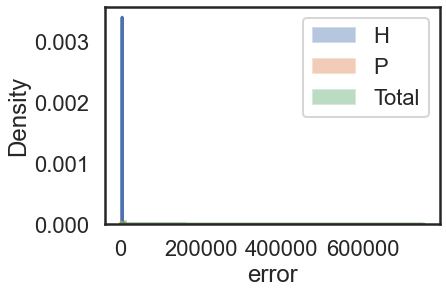

In [27]:
sns.distplot(sum_df.h_err, label='H')
sns.distplot(sum_df.p_err, label='P')
sns.distplot(sum_df.error, label='Total')
plt.legend()


In [28]:
lowest_ids = sum_df.nsmallest(columns='error', n=10)['run_id']

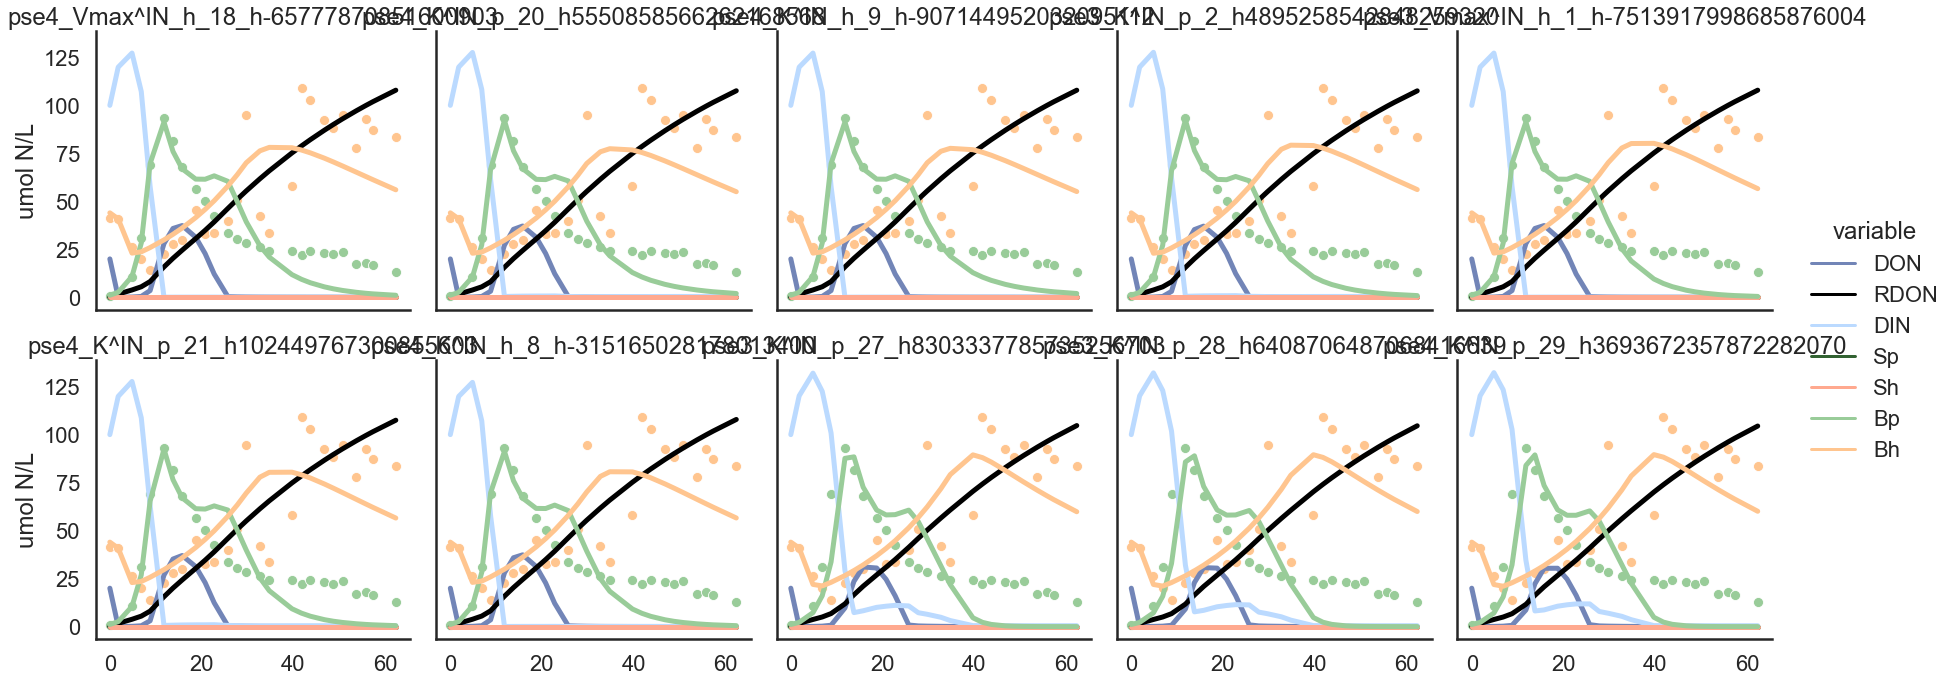

In [29]:
g = sns.relplot(
    data=mdf.loc[mdf.variable.isin(ccnorder) & mdf.run_id.isin(lowest_ids)], 
    x='day', y='value',
    hue='variable', hue_order=ccnorder, palette=ccnpalette,
    #estimator=None, units='run_id',
    col='run_id', col_order=lowest_ids, col_wrap=5,
    kind='line', lw=5,
)


def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)

g.map(pp)
g.set(ylabel='umol N/L')
g.set_titles(col_template='{col_name}',)



In [30]:
lowest_ids


926     pse4_Vmax^IN_h_18_h-65777870851600903
546       pse4_K^IN_p_20_h5550858566262168568
62         pse4_K^IN_h_9_h-907144952032095112
103        pse3_K^IN_p_2_h4895258542848259320
480    pse3_Vmax^IN_h_1_h-7513917998685876004
540        pse4_K^IN_p_21_h102449767300855603
54         pse4_K^IN_h_8_h-315165028178013400
905       pse3_K^IN_p_27_h8303337785735256703
167       pse3_K^IN_p_28_h6408706487068416639
695       pse4_K^IN_p_29_h3693672357872282070
Name: run_id, dtype: object

In [107]:
sum_df.columns

Index(['Unnamed: 0', 'M_h', 'M_p', 'gamma^D_p', 'gamma^D_h', 'R_p', 'R_h',
       'E^O_p', 'E^I_p', 'E^O_h', 'E^I_h', 'K^ON_p', 'K^IN_p', 'K^OC_p',
       'K^IC_p', 'K^ON_h', 'K^IN_h', 'K^OC_h', 'K^IC_h', 'Vmax^ON_p',
       'Vmax^IN_p', 'Vmax^OC_p', 'Vmax^IC_p', 'Vmax^ON_h', 'Vmax^IN_h',
       'Vmax^OC_h', 'Vmax^IC_h', 'O_p', 'O_h', 'epsilon', 'VTmax', 'KT_h',
       'omega', 'K^S_p', 'K^S_h', 'E^S_p', 'E^S_h', 'M^S_p', 'M^S_h', 'tau',
       'r0_p', 'r0_h', 'b_p', 'b_h', 'run_id', 'status', 'h_err', 'p_err',
       'error', 'logerror', 'message', 'negative', 'zero', 'type'],
      dtype='object')

In [31]:
sum_df.nlargest(10, 'error', )

Unnamed: 0       M_h       M_p  gamma^D_p  gamma^D_h    R_p    R_h  \
27280           0  0.000008  0.000006   0.449707   0.199707  6.625  6.625   
28634           0  0.000006  0.000006   0.378418   0.823730  6.625  6.625   
28813           0  0.000001  0.000002   0.325684   0.386230  6.625  6.625   
20113           0  0.000001  0.000002   0.325684   0.386230  6.625  6.625   
12327           0  0.000001  0.000002   0.325684   0.386230  6.625  6.625   
28289           0  0.000006  0.000006   0.378418   0.356934  6.625  6.625   
9765            0  0.000006  0.000006   0.378418   0.356934  6.625  6.625   
7748            0  0.000006  0.000006   0.378418   0.356934  6.625  6.625   
17232           0  0.000006  0.000006   0.378418   0.356934  6.625  6.625   
25547           0  0.000005  0.000008   0.206543   0.290527  6.625  6.625   

              E^O_p     E^I_p     E^O_h  ...      r0_h   b_p   b_h  \
27280  2.085368e-07  0.000007  0.000005  ...  0.000002  0.01  0.01   
28634  1.016744e-05  0.000004  0.000003  ...  0.000002  0.01  0.01   
28813  4.735311e-06  0.000007  0.000005  ...  0.000002  0.01  0.01   
20113  4.735311e-06  0.000007  0.000005  ...  0.000002  0.01  0.01   
12327  4.735311e-06  0.000007  0.000005  ...  0.000002  0.01  0.01   
28289  1.016744e-05  0.000004  0.000003  ...  0.000002  0.01  0.01   
9765   1.016744e-05  0.000004  0.000003  ...  0.000002  0.01  0.01   
7748   1.016744e-05  0.000004  0.000003  ...  0.000002  0.01  0.01   
17232  1.016744e-05  0.000004  0.000003  ...  0.000002  0.01  0.01   
25547  5.701701e-06  0.000003  0.000004  ...  0.000002  0.01  0.01   

                                run_id  status          h_err          p_err  \
27280   se3_21149_h9021080899994806860       0    5060.136014  747244.013716   
28634   se3_41416_h4438319646737141595       0  162182.761014  279498.522063   
28813   se3_53332_h7007028296812871200       0   33857.183241  400426.839823   
20113   se3_53324_h7360796284991649406       0   33732.444464  400169.682541   
12327  se3_53325_h-3131473796794600801       0   33668.375435  398822.097098   
28289  se3_41420_h-7965779106177122321       0  119419.092705  284598.685965   
9765    se3_41431_h3268427185349703842       0  132095.633770  267912.564168   
7748   se3_41432_h-4605769557414816584       0  131782.219727  265849.269719   
17232   se3_41426_h8378606727526422688       0  131783.394454  265750.557818   
25547  se3_61313_h-4142183228792316062       0   56223.916333  209491.856057   

               error   logerror  message  
27280  752304.149731  13.530896      NaN  
28634  441681.283077  12.998344      NaN  
28813  434284.023064  12.981454      NaN  
20113  433902.127005  12.980574      NaN  
12327  432490.472533  12.977316      NaN  
28289  404017.778670  12.909214      NaN  
9765   400008.197937  12.899240      NaN  
7748   397631.489446  12.893281      NaN  
17232  397533.952272  12.893036      NaN  
25547  265715.772390  12.490182      NaN  

[10 rows x 51 columns]

In [130]:
i = sum_df.loc[sum_df.error < 680,['error', 'run_id','K^IN_p', 'K^IN_h', 'Vmax^IN_p', 'Vmax^IN_h']]
i['param'] = i['run_id'].str.split('_', n=1, expand=True)[1].str.rsplit('_', n=2, expand=True)[0]
i['param'].value_counts()
i

error                                   run_id     K^IN_p    K^IN_h  \
3    637.180932      pse4_K^IN_p_24_h7836943193073744922   2.916912  0.250272   
42   670.422067  pse4_Vmax^IN_h_28_h-1636412891997828049   0.142751  0.250272   
50   621.016616      pse4_K^IN_p_22_h4451689100485226803   1.545473  0.250272   
54   608.144036       pse4_K^IN_h_8_h-315165028178013400   0.142751  0.031759   
62   596.102831       pse4_K^IN_h_9_h-907144952032095112   0.142751  0.043631   
..          ...                                      ...        ...       ...   
859  662.741153    pse3_Vmax^IN_h_4_h5453065723120339227   0.142751  0.250272   
884  629.504005      pse3_K^IN_p_18_h1152821160942263264   8.860936  0.250272   
905  618.019290      pse3_K^IN_p_27_h8303337785735256703  13.290690  0.250272   
908  635.499303      pse3_K^IN_p_14_h7697046039038975854   6.892156  0.250272   
931  618.317392     pse3_K^IN_p_29_h-9021463787978602026  14.275080  0.250272   

     Vmax^IN_p  Vmax^IN_h      param  
3      0.00001   0.000005     K^IN_p  
42     0.00001   0.000364  Vmax^IN_h  
50     0.00001   0.000005     K^IN_p  
54     0.00001   0.000005     K^IN_h  
62     0.00001   0.000005     K^IN_h  
..         ...        ...        ...  
859    0.00001   0.000069  Vmax^IN_h  
884    0.00001   0.000005     K^IN_p  
905    0.00001   0.000005     K^IN_p  
908    0.00001   0.000005     K^IN_p  
931    0.00001   0.000005     K^IN_p  

[93 rows x 7 columns]

In [32]:
sum_df.nsmallest(columns='error', n=1).T

926
Unnamed: 0                                      0
M_h                                      0.000001
M_p                                      0.000001
gamma^D_p                                     0.8
gamma^D_h                                     0.8
R_p                                         6.625
R_h                                         6.625
E^O_p                                    0.000001
E^I_p                                         0.0
E^O_h                                         0.0
E^I_h                                    0.000001
K^ON_p                                   0.142751
K^IN_p                                   0.142751
K^OC_p                                   0.142751
K^IC_p                                   0.142751
K^ON_h                                   0.250272
K^IN_h                                   0.250272
K^OC_h                                   0.250272
K^IC_h                                   0.250272
Vmax^ON_p                                     0.0
Vmax^IN_p                                 0.00001
Vmax^OC_p                                     0.0
Vmax^IC_p                                0.000093
Vmax^ON_h                                0.000005
Vmax^IN_h                                0.000015
Vmax^OC_h                                0.000033
Vmax^IC_h                                     0.0
O_p                                           1.0
O_h                                           1.0
epsilon                                  0.000001
VTmax                                    0.000002
KT_h                                     0.250272
omega                                        0.01
K^S_p                                    14.27508
K^S_h                                    14.27508
E^S_p                                         0.0
E^S_h                                         0.0
M^S_p                                        -0.0
M^S_h                                        -0.0
tau                                  52173.913043
r0_p                                     0.000002
r0_h                                     0.000002
b_p                                          0.01
b_h                                          0.01
run_id      pse4_Vmax^IN_h_18_h-65777870851600903
status                                          0
h_err                                  427.406173
p_err                                  165.788707
error                                   593.19488
logerror                                 6.385523
message                                       NaN

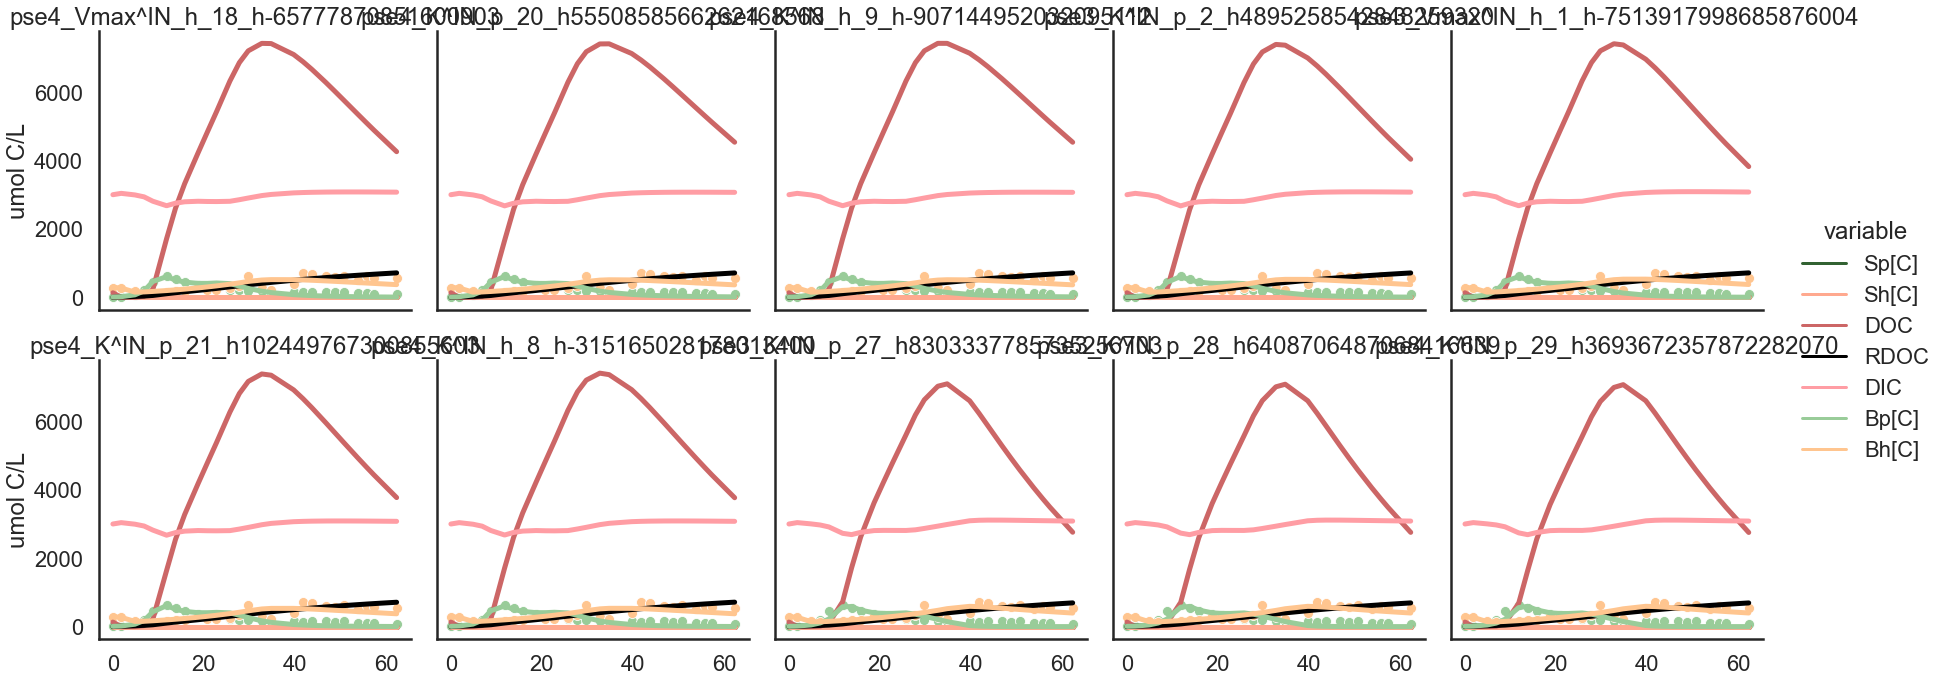

In [33]:
g = sns.relplot(
    data=mdf.loc[mdf.variable.isin(cccorder) & mdf.run_id.isin(lowest_ids)], 
    x='day', y='value',
    hue='variable', hue_order=cccorder, palette=cccpalette,
    #estimator=None, units='run_id',
    col='run_id', col_order=lowest_ids, col_wrap=5,
    kind='line', lw=5,
)


def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[C]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[C]', ax=ax, s=100, legend=False, color=HCOLOR)

g.map(pp)
g.set(ylabel='umol C/L')
g.set_titles(col_template='{col_name}',)



In [34]:
df.shape

In [35]:
pos_run_ids = df.loc[(df.day >= 12) & ((df['Bp'] > 1e-1) | (df['Bh'] > 1e-1)), 'run_id'].unique()


In [96]:
pos_run_ids2 = df.loc[(df.day >= 5) & ((df['Bp'] > 1e-1) | (df['Bh'] > 1e-1)), 'run_id'].unique()


In [102]:
max_day = df.loc[((df['Bp'] > 1e-1) | (df['Bh'] > 1e-1))].groupby('run_id')['day'].max()

In [105]:
max_day

run_id
de3_h-1073436347008145156         11.803472
de3_h-1575953767854033835          4.832639
de3_h-1659825646723300236          8.779167
de3_h-1765083009615901515          6.853472
de3_h-2171644033102072858         11.803472
                                    ...    
se4_9997_h-3754506412674489931     1.820833
se4_9998_h-3906930901186799149     1.820833
se4_9999_h3201429608343814550      1.820833
se4_999_h57759537092892476         1.820833
se4_99_h-2888973244660551875       1.820833
Name: day, Length: 111368, dtype: float64

In [106]:
max_day.value_counts()

1.820833     47019
4.832639     18223
8.779167     13724
6.853472     12647
11.803472     4840
13.770833     3026
15.774306     2751
62.351389     2234
18.715278     1304
22.753472     1156
20.777778     1122
34.771528      529
29.747917      504
25.720139      495
43.717361      325
41.790972      315
27.794444      247
32.721528      217
39.713889      171
48.746528      154
53.763889      106
46.776389       86
57.351389       64
50.740278       55
55.800694       46
0.000000         8
Name: day, dtype: int64

<AxesSubplot:xlabel='count', ylabel='day'>

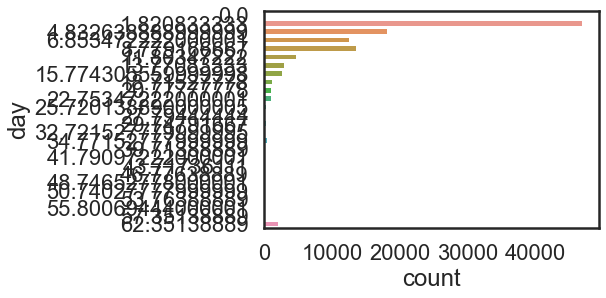

In [104]:
sns.countplot(y=max_day)

In [97]:
pos_run_ids2.shape

In [37]:
pos_run_ids.shape

In [38]:
sum_df['negative'] = False
sum_df.loc[sum_df.run_id.isin(neg_ids), 'negative'] = True

In [39]:
sum_df['zero'] = False
sum_df.loc[~sum_df.run_id.isin(pos_run_ids), 'zero'] = True

In [40]:
sum_df.groupby(['negative', 'zero'])['run_id'].count()

negative  zero 
False     False    13873
          True     89026
True      False     1034
          True      7500
Name: run_id, dtype: int64

In [96]:
df.loc[df.run_id.isin(zero_run_ids) & (df.day > 12) & ((df['Bp'] > 1) & (df['Bh'] > 1))]

Empty DataFrame
Columns: [Unnamed: 0, Bp, Bh, DON, RDON, DIN, DOC, RDOC, DIC, ROS, Sp, Sh, t, day, Xp, Xh, limINp, limONp, limICp, limOCp, limINh, limONh, limICh, limOCh, gross_uptakeINp, gross_uptakeONp, gross_uptakeICp, gross_uptakeOCp, gross_uptakeINh, gross_uptakeONh, gross_uptakeICh, gross_uptakeOCh, actual_uptakeNp, actual_uptakeNh, overflowNp, overflowCp, overflowNh, overflowCh, deathp, deathh, exudationOp, exudationIp, exudationOh, exudationIh, Treleasep, Tbreakdownh, respirationp, respirationh, dic_uptake, Bp[C], Bh[C], Sp[C], Sh[C], run_id]
Index: []

[0 rows x 54 columns]

In [41]:
import hdbscan


In [42]:
import umap

In [43]:
mdf.day.unique()

array([ 0.        ,  1.82083333,  4.83263889,  6.85347222,  8.77916667,
       11.80347222, 13.77083333, 15.77430556, 18.71527778, 20.77777778,
       22.75347222, 25.72013889, 27.79444444, 29.74791667, 32.72152778,
       34.77152778, 39.71388889, 41.79097222, 43.71736111, 46.77638889,
       48.74652778, 50.74027778, 53.76388889, 55.80069444, 57.35138889,
       62.35138889])

In [44]:
sample_cols_umap = ['Bp', 'Bh', 'DON', 'DIN', 'RDON', 'DOC', 'DIC', 'RDOC']
sample_cols_HDBSCAN = ['Bp', 'Bh',]

sample_days = [ 5, 12, 16, 19, 42, 62]
#sample_days_2 = [ 5, 12, 16, 20, 42, 60]




In [45]:
tdf = mdf.loc[mdf.day.round(0).isin(sample_days) 
              & mdf.variable.isin(sample_cols_umap) 
              & mdf.run_id.isin(sum_df.run_id)
              & mdf.run_id.isin(pos_run_ids)
              & ~mdf.run_id.isin(neg_ids)
             ]
tdf['day0'] = tdf.day.round(0)
Xu = tdf.pivot(index='run_id', columns=['variable', 'day0'], values=['value'])

C:\Users\wosnat\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [46]:
tdf2 = mdf.loc[mdf.day.round(0).isin(sample_days) 
              & mdf.variable.isin(sample_cols_HDBSCAN) 
              & mdf.run_id.isin(sum_df.run_id)
              & mdf.run_id.isin(pos_run_ids)
              & ~mdf.run_id.isin(neg_ids)
             ]
tdf2['day0'] = tdf2.day.round(0)
Xh = tdf2.pivot(index='run_id', columns=['variable', 'day0'], values=['value'])

C:\Users\wosnat\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [47]:
reducer = umap.UMAP(random_state=42)
umap_embedding = reducer.fit_transform(Xu)

In [48]:
udf = pd.DataFrame(data=umap_embedding, columns=['UMAP1','UMAP2'])

In [49]:
udf['run_id'] = Xu.index

In [50]:
udf = pd.merge(udf, sum_df, on='run_id', how='left')

In [ ]:
              & mdf.run_id.isin(pos_run_ids)
              & ~mdf.run_id.isin(neg_ids)
udf = pd.merge(udf, sum_df, on='run_id', how='left')

udf['logerror'] = np.log(udf['error'])

In [51]:
udf.loc[udf.logerror.isna()]

Empty DataFrame
Columns: [UMAP1, UMAP2, run_id, Unnamed: 0, M_h, M_p, gamma^D_p, gamma^D_h, R_p, R_h, E^O_p, E^I_p, E^O_h, E^I_h, K^ON_p, K^IN_p, K^OC_p, K^IC_p, K^ON_h, K^IN_h, K^OC_h, K^IC_h, Vmax^ON_p, Vmax^IN_p, Vmax^OC_p, Vmax^IC_p, Vmax^ON_h, Vmax^IN_h, Vmax^OC_h, Vmax^IC_h, O_p, O_h, epsilon, VTmax, KT_h, omega, K^S_p, K^S_h, E^S_p, E^S_h, M^S_p, M^S_h, tau, r0_p, r0_h, b_p, b_h, status, h_err, p_err, error, logerror, message, negative, zero]
Index: []

[0 rows x 55 columns]

In [52]:
udf['type'] = udf.run_id.str.replace('_.*','', regex=True)

<AxesSubplot:>

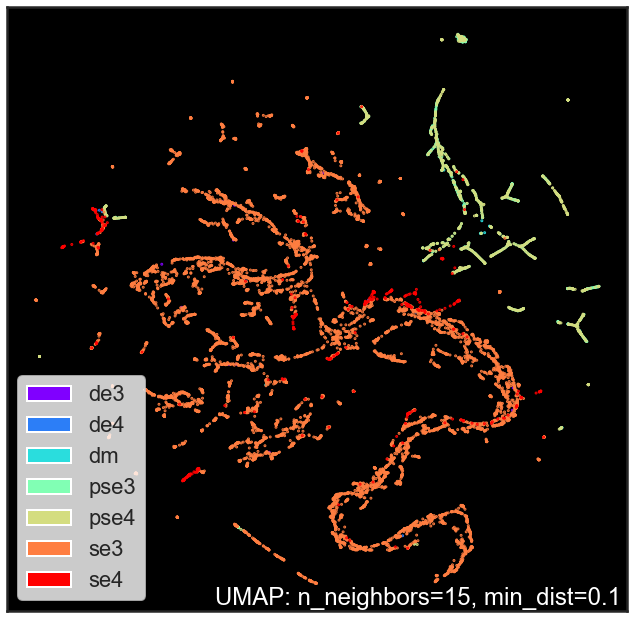

In [53]:
import umap.plot
umap.plot.points(reducer, labels=udf['type'], theme='fire')

<AxesSubplot:>

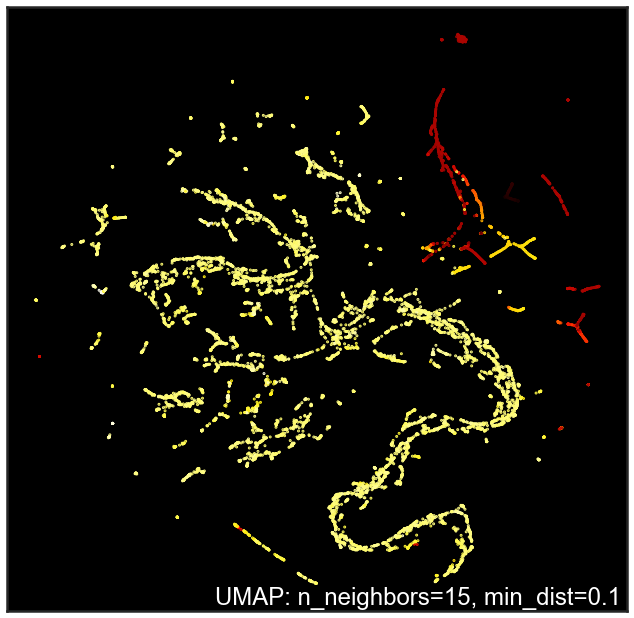

In [54]:
import umap.plot
umap.plot.points(reducer, values=udf['logerror'], theme='fire')

In [55]:
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=400, 
    min_samples=5, 
    core_dist_n_jobs=1, 
    cluster_selection_epsilon = 10.0,
    #cluster_selection_method='leaf'
)
clusterer.fit(Xu)


HDBSCAN(cluster_selection_epsilon=10.0, core_dist_n_jobs=1,
        min_cluster_size=400, min_samples=5)

In [56]:
clusterer.labels_

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [57]:
clusterer.labels_.max()

3

In [58]:
(clusterer.labels_ < 0).sum()

2027

In [59]:
np.unique(clusterer.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3], dtype=int64),
 array([2027,  463, 1124,  487, 9772], dtype=int64))

In [60]:
udf.shape

In [61]:
udf['cluster'] = clusterer.labels_

<AxesSubplot:>

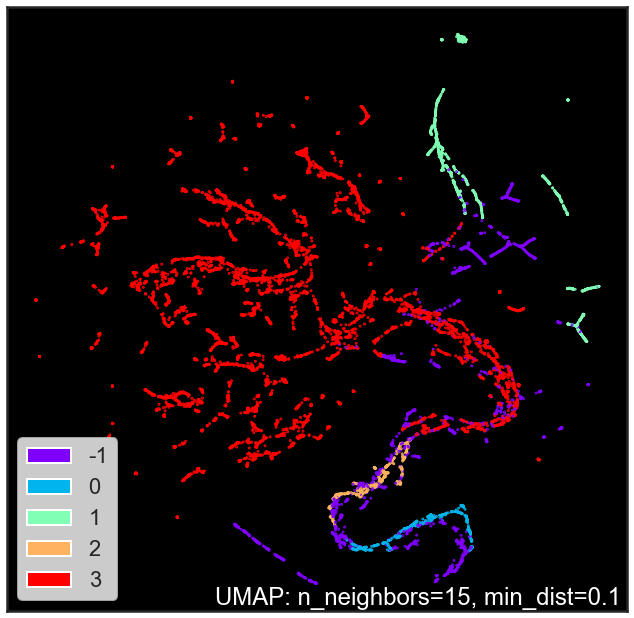

In [62]:
import umap.plot
umap.plot.points(reducer, labels=udf['cluster'], theme='fire')

In [63]:
clusterer2 = hdbscan.HDBSCAN(
    min_cluster_size=500, 
    min_samples=10, 
    core_dist_n_jobs=1, 
    #cluster_selection_epsilon = 0.01,
    #cluster_selection_method='leaf'
)
clusterer2.fit(Xu.loc[Xu.index.isin(udf.loc[udf.cluster==-1, 'run_id'])])


HDBSCAN(core_dist_n_jobs=1, min_cluster_size=500, min_samples=10)

In [64]:
clusterer2.labels_.max()

1

In [65]:
(clusterer2.labels_ < 0).sum()

798

In [66]:
np.unique(clusterer2.labels_, return_counts=True)

(array([-1,  0,  1], dtype=int64), array([798, 552, 677], dtype=int64))

In [67]:
udf['cluster2'] = udf['cluster']
udf.loc[udf.cluster==-1, 'cluster2'] = clusterer2.labels_ + udf['cluster'].max() + 2

<AxesSubplot:>

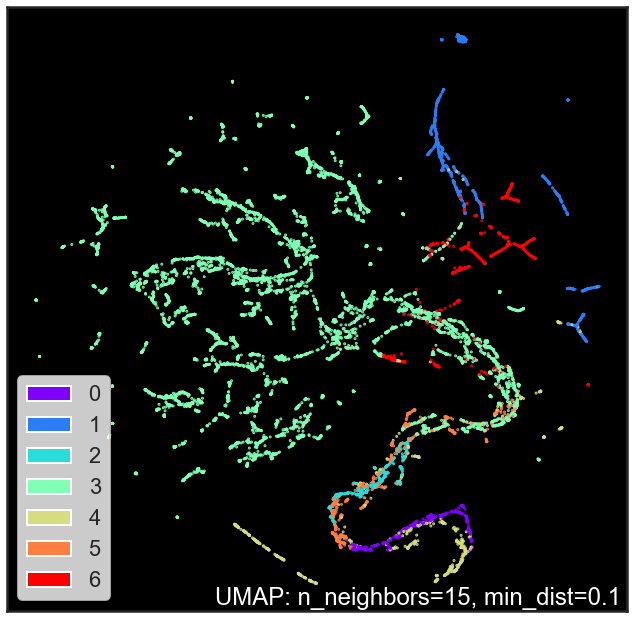

In [68]:
import umap.plot
umap.plot.points(reducer, labels=udf['cluster2'], theme='fire')

<AxesSubplot:>

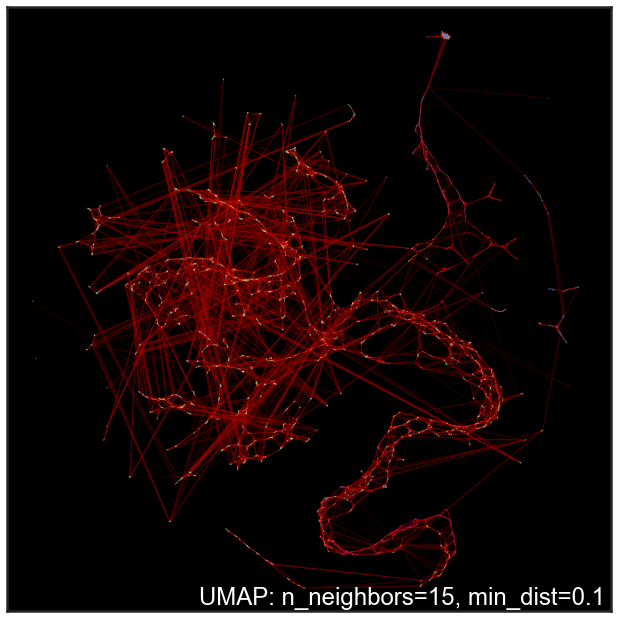

In [69]:
umap.plot.connectivity(reducer, show_points=True, theme='fire',
                       labels=udf['cluster2'],#edge_bundling='hammer'
                      )

In [70]:
udf.groupby('cluster2')['error'].describe()

count         mean          std          min          25%  \
cluster2                                                               
0          463.0  5605.285899    45.836214  5491.936647  5584.630241   
1         1124.0  1499.067341   388.589182   894.265260  1356.424094   
2          487.0  5601.179091    31.678193  5525.570405  5586.727744   
3         9772.0  5551.486664   352.873274  1278.504049  5567.370245   
4          798.0  5181.481606   936.624648  1167.064328  5332.592133   
5          552.0  5583.033093    52.274231  5044.513181  5565.410696   
6          677.0  3507.546171  1896.580249   593.194880  1391.311785   

                  50%          75%          max  
cluster2                                         
0         5599.961135  5616.305223  5801.201096  
1         1357.147261  1362.971819  3366.605169  
2         5592.502034  5607.891566  5784.289883  
3         5591.380795  5616.424774  6011.798459  
4         5504.236780  5569.367213  5817.343811  
5         5593.060197  5605.801011  5789.066505  
6         4480.031177  4809.475724  5744.685593

In [71]:
udf.groupby(['type', 'cluster'])['run_id'].count()

type  cluster
de3   -1            3
       3           14
de4   -1            3
       3           15
dm    -1           20
       1           35
       3           12
pse3  -1          269
       1          547
       3          115
pse4  -1          288
       1          542
       3          138
se3   -1         1339
       0          463
       2          487
       3         8965
se4   -1          105
       3          513
Name: run_id, dtype: int64

In [72]:
udf.groupby(['type', 'cluster2'])['run_id'].count()

type  cluster2
de3   3             14
      5              3
de4   3             15
      4              1
      5              1
      6              1
dm    1             35
      3             12
      4              8
      6             12
pse3  1            547
      3            115
      4             30
      6            239
pse4  1            542
      3            138
      4             28
      6            260
se3   0            463
      2            487
      3           8965
      4            690
      5            520
      6            129
se4   3            513
      4             41
      5             28
      6             36
Name: run_id, dtype: int64

In [73]:
sorted(udf.cluster2.unique())

[0, 1, 2, 3, 4, 5, 6]

In [82]:
udf.columns

Index(['UMAP1', 'UMAP2', 'run_id', 'Unnamed: 0', 'M_h', 'M_p', 'gamma^D_p',
       'gamma^D_h', 'R_p', 'R_h', 'E^O_p', 'E^I_p', 'E^O_h', 'E^I_h', 'K^ON_p',
       'K^IN_p', 'K^OC_p', 'K^IC_p', 'K^ON_h', 'K^IN_h', 'K^OC_h', 'K^IC_h',
       'Vmax^ON_p', 'Vmax^IN_p', 'Vmax^OC_p', 'Vmax^IC_p', 'Vmax^ON_h',
       'Vmax^IN_h', 'Vmax^OC_h', 'Vmax^IC_h', 'O_p', 'O_h', 'epsilon', 'VTmax',
       'KT_h', 'omega', 'K^S_p', 'K^S_h', 'E^S_p', 'E^S_h', 'M^S_p', 'M^S_h',
       'tau', 'r0_p', 'r0_h', 'b_p', 'b_h', 'status', 'h_err', 'p_err',
       'error', 'logerror', 'message', 'negative', 'zero', 'type', 'cluster',
       'cluster2'],
      dtype='object')

In [83]:
sum_df.columns

Index(['Unnamed: 0', 'M_h', 'M_p', 'gamma^D_p', 'gamma^D_h', 'R_p', 'R_h',
       'E^O_p', 'E^I_p', 'E^O_h', 'E^I_h', 'K^ON_p', 'K^IN_p', 'K^OC_p',
       'K^IC_p', 'K^ON_h', 'K^IN_h', 'K^OC_h', 'K^IC_h', 'Vmax^ON_p',
       'Vmax^IN_p', 'Vmax^OC_p', 'Vmax^IC_p', 'Vmax^ON_h', 'Vmax^IN_h',
       'Vmax^OC_h', 'Vmax^IC_h', 'O_p', 'O_h', 'epsilon', 'VTmax', 'KT_h',
       'omega', 'K^S_p', 'K^S_h', 'E^S_p', 'E^S_h', 'M^S_p', 'M^S_h', 'tau',
       'r0_p', 'r0_h', 'b_p', 'b_h', 'run_id', 'status', 'h_err', 'p_err',
       'error', 'logerror', 'message', 'negative', 'zero'],
      dtype='object')

In [92]:
sum_df2 = pd.merge(sum_df, udf[['run_id', 'cluster', 'cluster2', 'UMAP1', 'UMAP2', ]],
                  on='run_id', how='left')
sum_df2
#    & mdf.run_id.isin(pos_run_ids)
#              & ~mdf.run_id.isin(neg_ids)
#udf = pd.merge(udf, sum_df, on='run_id', how='left')

Unnamed: 0           M_h           M_p  gamma^D_p  gamma^D_h    R_p  \
0                0  4.502398e-06  3.996791e-06   0.365975   0.070244  6.625   
1                0  4.001982e-06  7.086781e-06   0.040492   0.911524  6.625   
2                0  5.660195e-06  1.106181e-05   0.701770   0.569487  6.625   
3                0  7.570845e-06  9.444341e-06   0.079173   0.384086  6.625   
4                0  6.165933e-07  1.176978e-08   0.201885   0.221401  6.625   
...            ...           ...           ...        ...        ...    ...   
111428           0  9.805185e-06  9.805185e-06   0.133301   0.297363  6.625   
111429           0  1.117282e-05  1.881917e-06   0.286621   0.175293  6.625   
111430           0  1.412851e-07  2.548783e-06   0.916504   0.455566  6.625   
111431           0  3.724275e-06  1.520228e-06   0.204590   0.202637  6.625   
111432           0  8.335820e-06  3.238254e-06   0.149902   0.257324  6.625   

          R_h     E^O_p         E^I_p         E^O_h  ...        error  \
0       6.625  0.000009  1.013520e-05  2.476267e-07  ...  5604.400488   
1       6.625  0.000003  1.028460e-06  6.359510e-06  ...  5539.538657   
2       6.625  0.000004  7.134792e-06  9.880638e-07  ...  5533.579560   
3       6.625  0.000007  1.361663e-06  7.726777e-06  ...  5625.886133   
4       6.625  0.000008  5.495765e-06  4.297097e-06  ...  5623.191257   
...       ...       ...           ...           ...  ...          ...   
111428  6.625  0.000004  2.543132e-08  3.067017e-06  ...  5672.912933   
111429  6.625  0.000008  7.217407e-06  4.196167e-06  ...  5628.896352   
111430  6.625  0.000004  7.817586e-06  6.098429e-06  ...  5668.785274   
111431  6.625  0.000006  5.050659e-06  4.745483e-06  ...  5673.361821   
111432  6.625  0.000002  3.341675e-06  5.152384e-06  ...  5639.436318   

        logerror  message  negative   zero  type  cluster  cluster2  \
0       8.631307      NaN     False   True   de3      NaN       NaN   
1       8.619667      NaN     False  False   de3      3.0       3.0   
2       8.618590      NaN     False  False   de3     -1.0       5.0   
3       8.635134      NaN     False   True   de3      NaN       NaN   
4       8.634655      NaN     False   True   de3      NaN       NaN   
...          ...      ...       ...    ...   ...      ...       ...   
111428  8.643458      NaN     False   True   se4      NaN       NaN   
111429  8.635669      NaN      True   True   se4      NaN       NaN   
111430  8.642730      NaN     False   True   se4      NaN       NaN   
111431  8.643537      NaN     False   True   se4      NaN       NaN   
111432  8.637539      NaN      True   True   se4      NaN       NaN   

            UMAP1     UMAP2  
0             NaN       NaN  
1        1.997097  2.999031  
2       17.689962  0.374580  
3             NaN       NaN  
4             NaN       NaN  
...           ...       ...  
111428        NaN       NaN  
111429        NaN       NaN  
111430        NaN       NaN  
111431        NaN       NaN  
111432        NaN       NaN  

[111433 rows x 58 columns]

In [93]:
sum_df2.loc[sum_df2.zero, 'cluster2'] = 'zero'
sum_df2.loc[sum_df2.negative, 'cluster2'] = 'negative'


In [94]:
sum_df2.groupby(['cluster2', 'type' ]).run_id.count()

cluster2  type
0.0       se3       463
1.0       dm         35
          pse3      547
          pse4      542
2.0       se3       487
3.0       de3        14
          de4        15
          dm         12
          pse3      115
          pse4      138
          se3      8965
          se4       513
4.0       de4         1
          dm          8
          pse3       30
          pse4       28
          se3       690
          se4        41
5.0       de3         3
          de4         1
          se3       520
          se4        28
6.0       de4         1
          dm         12
          pse3      239
          pse4      260
          se3       129
          se4        36
negative  de3         2
          de4       187
          pse3        7
          pse4        4
          se3       817
          se4      7517
zero      de3        48
          de4       996
          se3     29380
          se4     58602
Name: run_id, dtype: int64

0


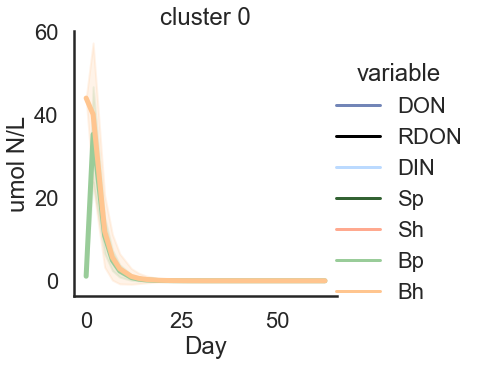

1


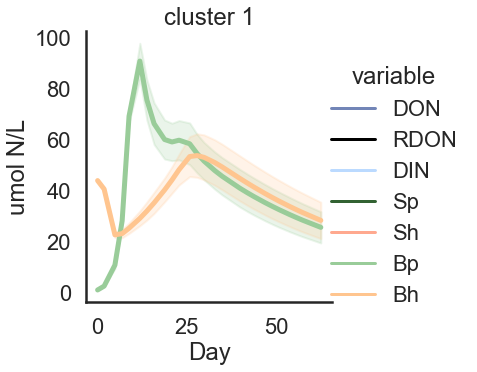

2


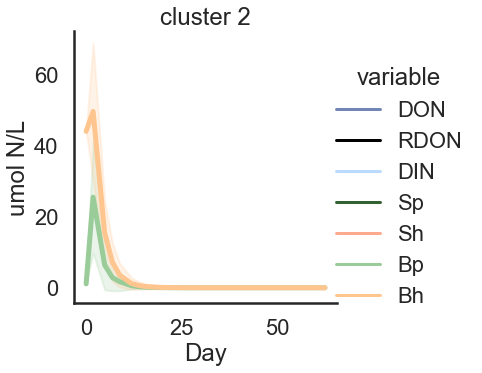

3


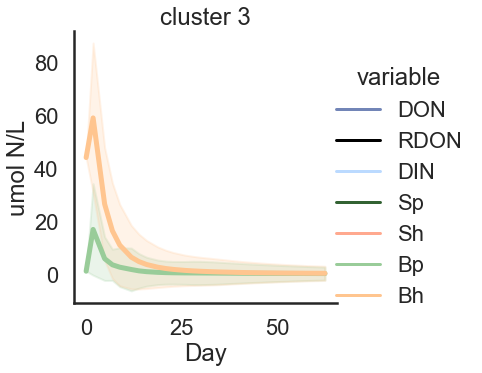

4


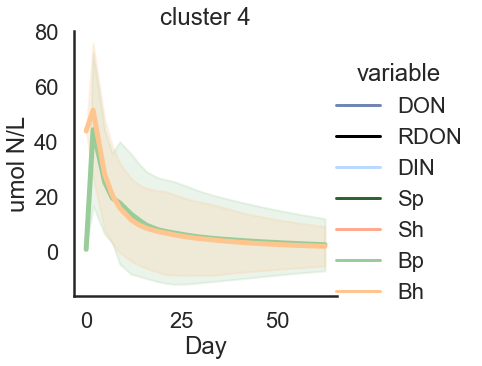

5


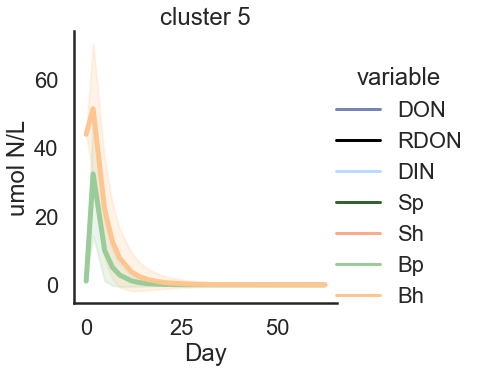

6


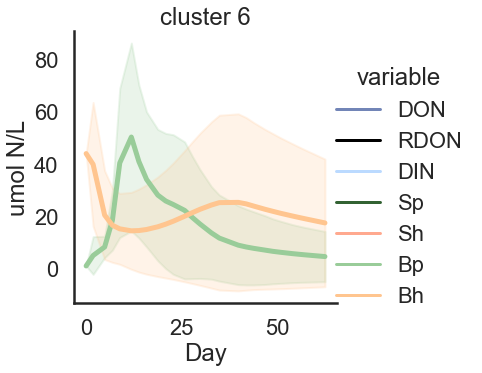

In [74]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't'], value_vars=ccnorder+cccorder)                            
mdf2['Day'] =mdf2['day'].round(5)
                            
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)


for i in sorted(udf.cluster2.unique()):
    print(i)
    #ids = list(udf.loc[udf.cluster2==i, 'run_id'].sample(50))
    all_ids = list(udf.loc[udf.cluster2==i, 'run_id'])
    #tdf = mdf2.loc[mdf2.variable.isin(ccnorder) & mdf2.run_id.isin(ids)]
    atdf = mdf2.loc[mdf2.variable.isin(['Bp', 'Bh']) & mdf2.run_id.isin(all_ids)]
#     g = sns.relplot(
#         data=tdf, 
#         x='Day', y='value',
#         hue='variable', hue_order=ccnorder, palette=ccnpalette,
#         estimator=None, units='run_id',
#         #col='run_id', col_order=ids, col_wrap=5,
#         kind='line', lw=0.5,
#         aspect=1.5, legend=False,
#     )
    g = sns.relplot(data=atdf,
        x='Day', y='value',
                    kind='line',
        hue='variable', hue_order=ccnorder, palette=ccnpalette, #legend=False, 
                     lw=5,ci='sd',
                 #ls='--',
    )


    #g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol N/L', title=f'cluster {i}')
    #g.set_titles(col_template='{col_name}',)
    plt.show()


0


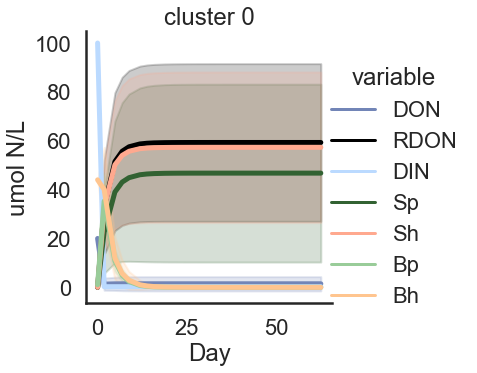

1


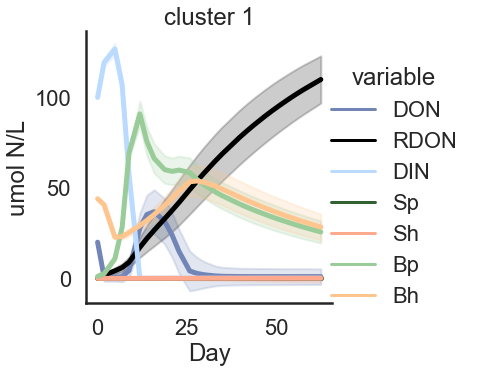

2


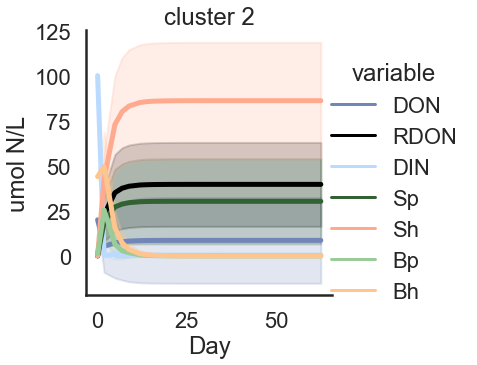

3


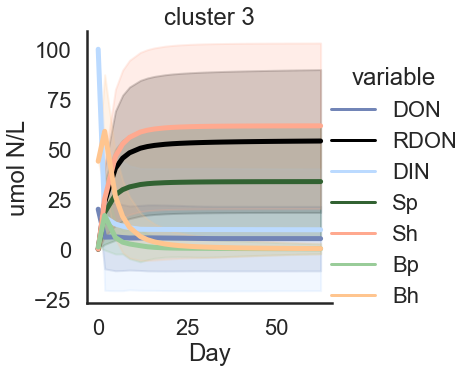

4


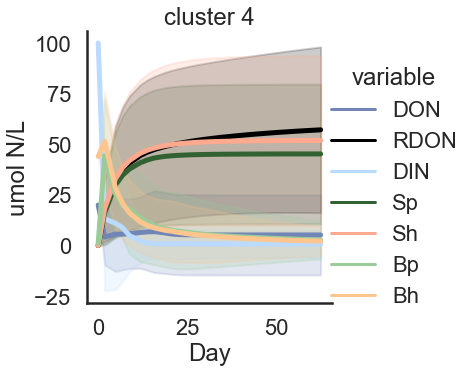

5


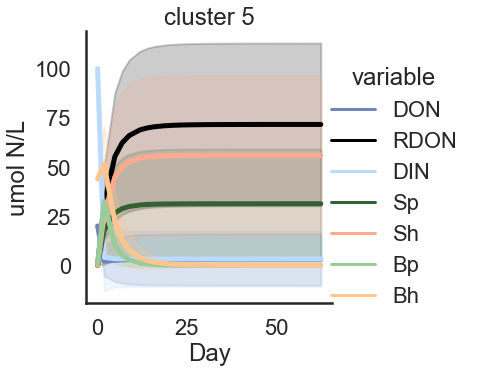

6


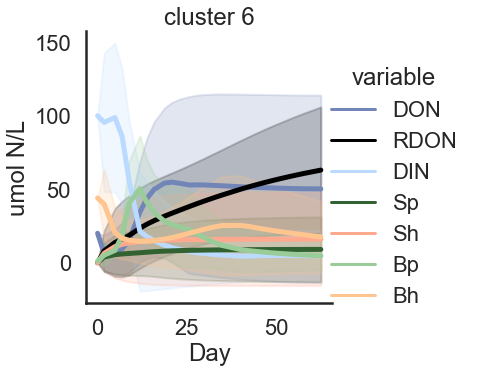

In [75]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't'], value_vars=ccnorder+cccorder)                            
mdf2['Day'] =mdf2['day'].round(5)
                            
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)


for i in sorted(udf.cluster2.unique()):
    print(i)
    #ids = list(udf.loc[udf.cluster2==i, 'run_id'].sample(50))
    all_ids = list(udf.loc[udf.cluster2==i, 'run_id'])
    #tdf = mdf2.loc[mdf2.variable.isin(ccnorder) & mdf2.run_id.isin(ids)]
    atdf = mdf2.loc[mdf2.variable.isin(ccnorder) & mdf2.run_id.isin(all_ids)]
#     g = sns.relplot(
#         data=tdf, 
#         x='Day', y='value',
#         hue='variable', hue_order=ccnorder, palette=ccnpalette,
#         estimator=None, units='run_id',
#         #col='run_id', col_order=ids, col_wrap=5,
#         kind='line', lw=0.5,
#         aspect=1.5, legend=False,
#     )
    g = sns.relplot(data=atdf,
        x='Day', y='value',
                    kind='line',
        hue='variable', hue_order=ccnorder, palette=ccnpalette, #legend=False, 
                     lw=5,ci='sd',
                 #ls='--',
    )


    #g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol N/L', title=f'cluster {i}')
    #g.set_titles(col_template='{col_name}',)
    plt.show()


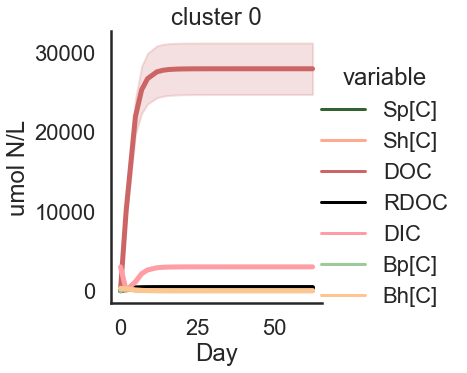

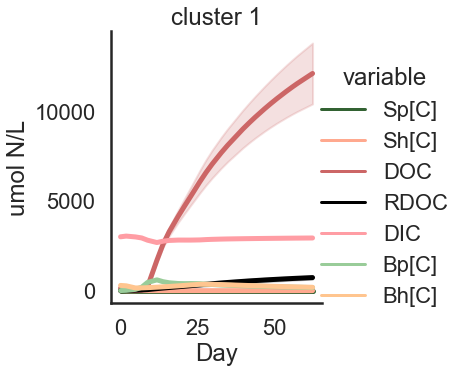

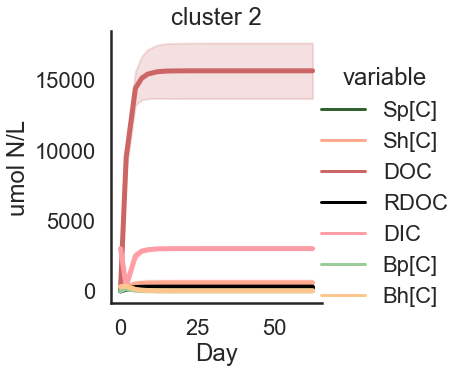

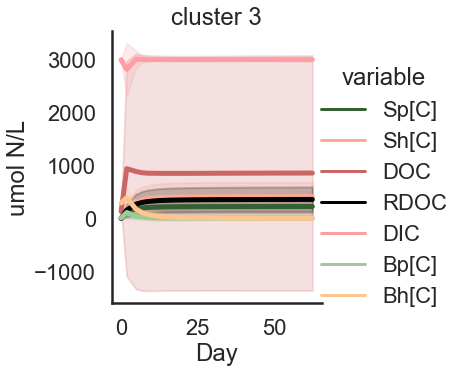

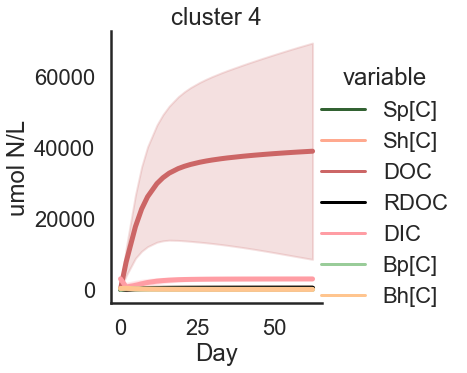

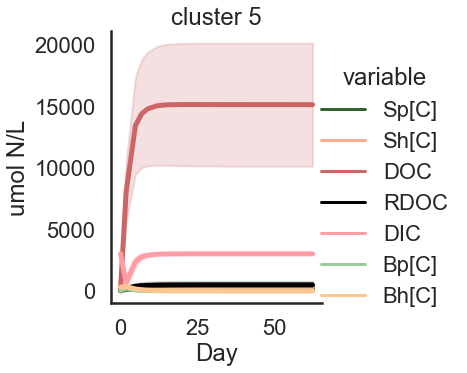

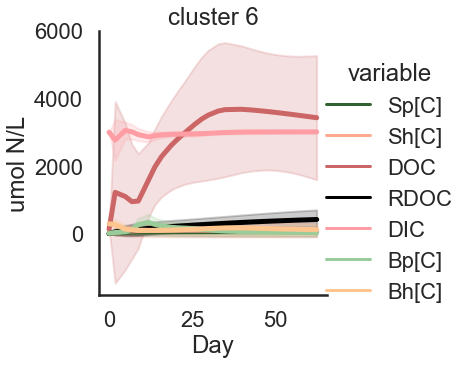

In [76]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't'], value_vars=ccnorder+cccorder)                            
mdf2['Day'] =mdf2['day'].round(5)
                            
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)


for i in sorted(udf.cluster2.unique()):
    #ids = list(udf.loc[udf.cluster==i, 'run_id'].sample(50))
    all_ids = list(udf.loc[udf.cluster2==i, 'run_id'])
    #tdf = mdf2.loc[mdf2.variable.isin(cccorder) & mdf2.run_id.isin(ids)]
    atdf = mdf2.loc[mdf2.variable.isin(cccorder) & mdf2.run_id.isin(all_ids)]
#     g = sns.relplot(
#         data=tdf, 
#         x='Day', y='value',
#         hue='variable', hue_order=ccnorder, palette=ccnpalette,
#         estimator=None, units='run_id',
#         #col='run_id', col_order=ids, col_wrap=5,
#         kind='line', lw=0.5,
#         aspect=1.5, legend=False,
#     )
    g = sns.relplot(data=atdf,
        x='Day', y='value',
                    kind='line',
        hue='variable', hue_order=cccorder, palette=cccpalette, #legend=False, 
                     lw=5,ci='sd',
                 #ls='--',
    )


    #g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol N/L', title=f'cluster {i}')
    #g.set_titles(col_template='{col_name}',)
    plt.show()


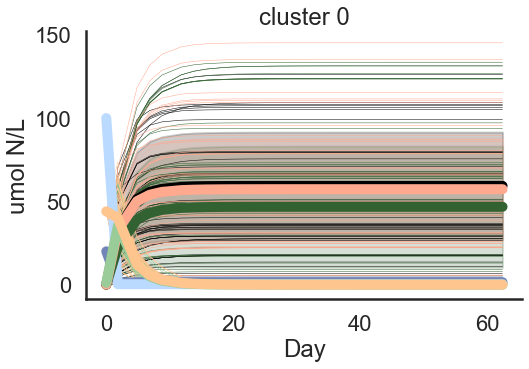

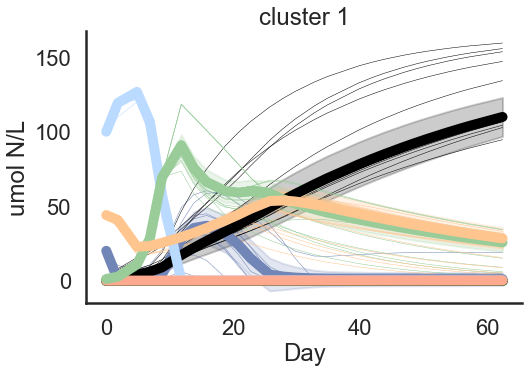

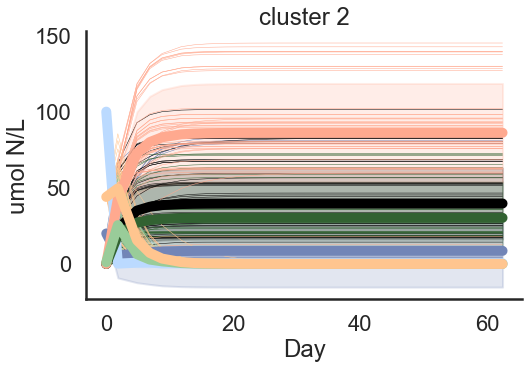

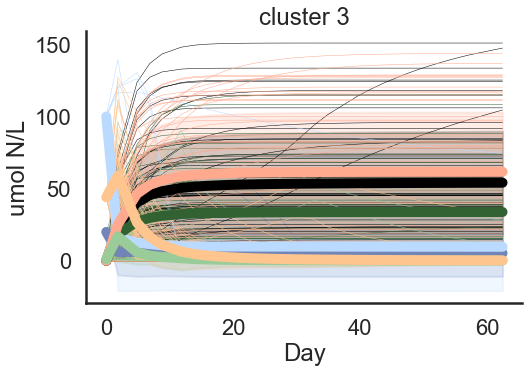

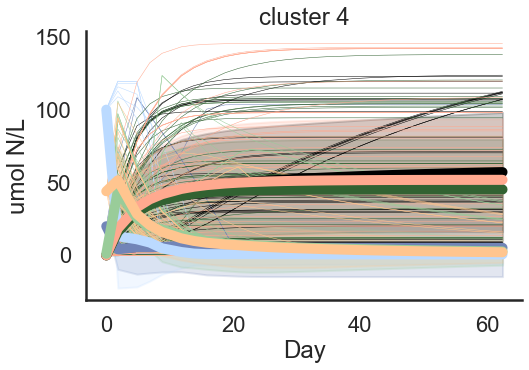

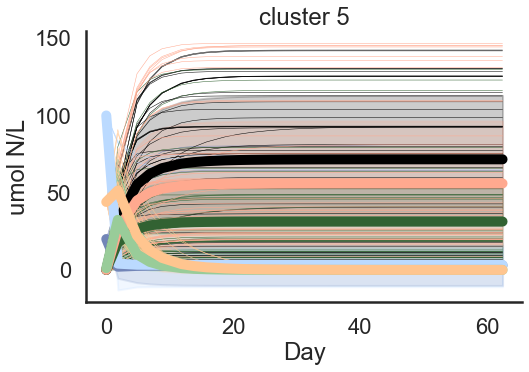

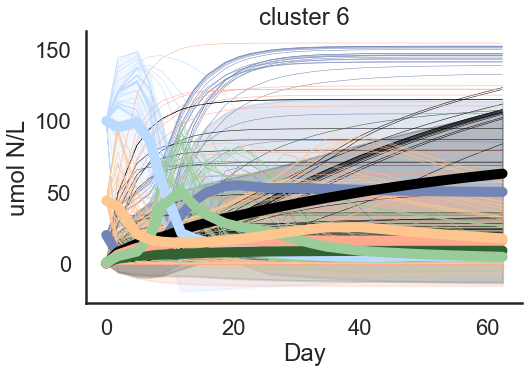

In [77]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't'], value_vars=ccnorder+cccorder)                            
mdf2['Day'] =mdf2['day'].round(5)
                            
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)


for i in sorted(udf.cluster2.unique()):
    ids = list(udf.loc[udf.cluster2==i, 'run_id'].sample(50))
    all_ids = list(udf.loc[udf.cluster2==i, 'run_id'])
    tdf = mdf2.loc[mdf2.variable.isin(ccnorder) & mdf2.run_id.isin(ids)]
    atdf = mdf2.loc[mdf2.variable.isin(ccnorder) & mdf2.run_id.isin(all_ids)]
    g = sns.relplot(
        data=tdf, 
        x='Day', y='value',
        hue='variable', hue_order=ccnorder, palette=ccnpalette,
        estimator=None, units='run_id',
        #col='run_id', col_order=ids, col_wrap=5,
        kind='line', lw=0.5,
        aspect=1.5, legend=False,
    )
    sns.lineplot(data=atdf,
        x='Day', y='value',
        hue='variable', hue_order=ccnorder, palette=ccnpalette, legend=False, lw=10,ci='sd',
                 #ls='--',
    )


    #g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol N/L', title=f'cluster {i}')
    g.set_titles(col_template='{col_name}',)


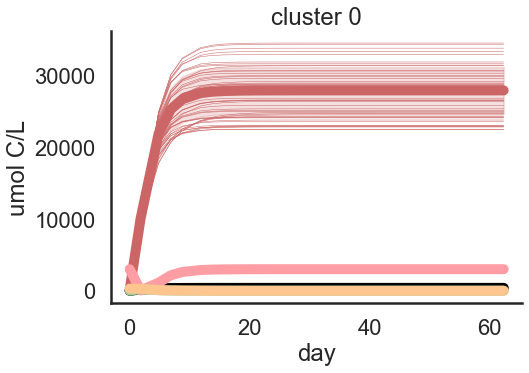

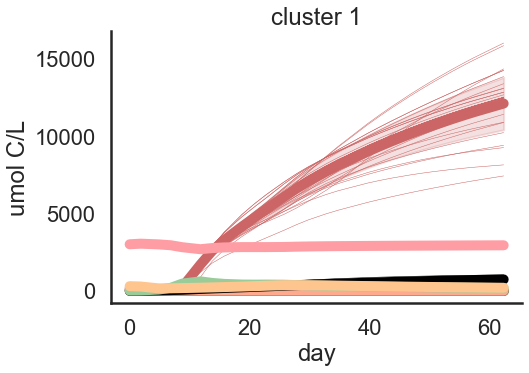

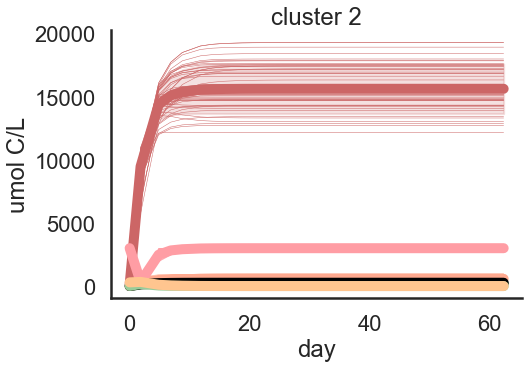

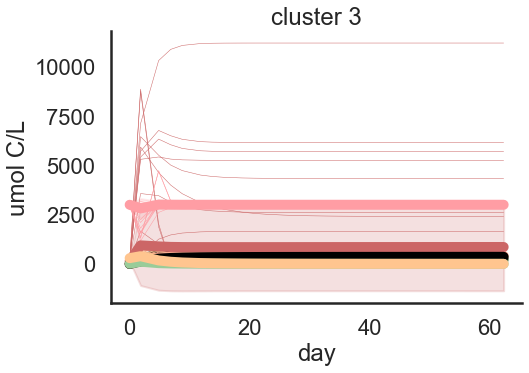

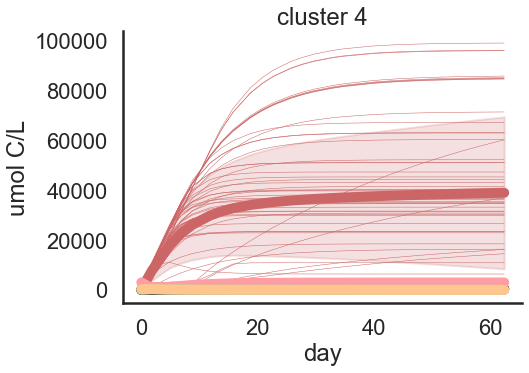

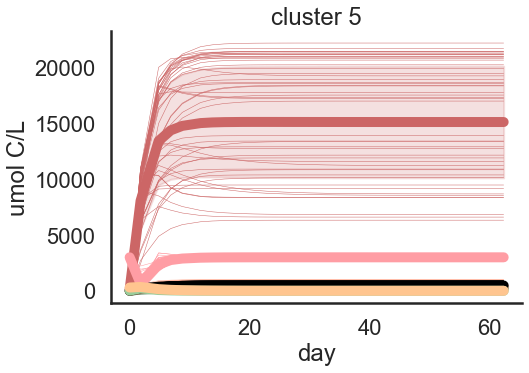

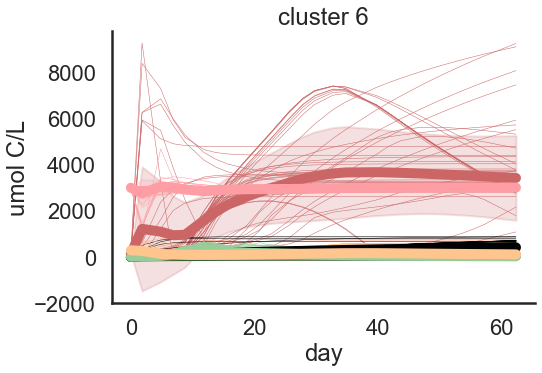

In [78]:
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[C]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[C]', ax=ax, s=100, legend=False, color=HCOLOR)




for i in sorted(udf.cluster2.unique()):
    ids = list(udf.loc[udf.cluster2==i, 'run_id'].sample(50))
    all_ids = list(udf.loc[udf.cluster2==i, 'run_id'])
    tdf = mdf2.loc[mdf2.variable.isin(cccorder) & mdf2.run_id.isin(ids)]
    atdf = mdf2.loc[mdf2.variable.isin(cccorder) & mdf2.run_id.isin(all_ids)]
    g = sns.relplot(
        data=tdf, 
        x='Day', y='value',
        hue='variable', hue_order=cccorder, palette=cccpalette,
        estimator=None, units='run_id',
        #col='run_id', col_order=ids, col_wrap=5,
        kind='line', lw=0.5,
        aspect=1.5, legend=False,
    )
    sns.lineplot(data=atdf,
        x='Day', y='value',
        hue='variable', hue_order=cccorder, palette=cccpalette, legend=False, lw=10, ci='sd'
    )


    #g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol C/L', xlabel='day', title=f'cluster {i}')
    g.set_titles(col_template='{col_name}',)


In [79]:
udf.head()

UMAP1      UMAP2                     run_id  Unnamed: 0       M_h  \
0  18.890024  -2.916807  de3_h-5199404030859100296           0  0.000002   
1   1.997097   2.999031  de3_h-6601083534190958371           0  0.000004   
2   2.235435  10.719465  de3_h-6829532549434309743           0  0.000007   
3  17.504025   1.536362  de3_h-8150081272942223152           0  0.000012   
4  -0.488726  -1.923404  de3_h-8336122282384212116           0  0.000005   

            M_p  gamma^D_p  gamma^D_h    R_p    R_h  ...        h_err  \
0  1.689151e-06   0.370747   0.650020  6.625  6.625  ...  4157.227027   
1  7.086781e-06   0.040492   0.911524  6.625  6.625  ...  3943.994574   
2  1.135832e-05   0.101176   0.961663  6.625  6.625  ...  4133.659886   
3  1.458270e-06   0.416303   0.171714  6.625  6.625  ...  4030.967452   
4  6.476261e-07   0.017162   0.213853  6.625  6.625  ...  3984.479705   

         p_err        error  logerror  message  negative   zero  type  \
0  1599.061758  5756.288785  8.658048      NaN     False  False   de3   
1  1595.544083  5539.538657  8.619667      NaN     False  False   de3   
2  1596.542560  5730.202446  8.653506      NaN     False  False   de3   
3  1635.511598  5666.479051  8.642323      NaN     False  False   de3   
4  1593.147822  5577.627526  8.626519      NaN     False  False   de3   

   cluster  cluster2  
0        3         3  
1        3         3  
2        3         3  
3        3         3  
4        3         3  

[5 rows x 58 columns]

In [131]:
Xh.columns

MultiIndex([('value', 'Bp',  5.0),
            ('value', 'Bp', 12.0),
            ('value', 'Bp', 16.0),
            ('value', 'Bp', 19.0),
            ('value', 'Bp', 42.0),
            ('value', 'Bp', 62.0),
            ('value', 'Bh',  5.0),
            ('value', 'Bh', 12.0),
            ('value', 'Bh', 16.0),
            ('value', 'Bh', 19.0),
            ('value', 'Bh', 42.0),
            ('value', 'Bh', 62.0)],
           names=[None, 'variable', 'day0'])

In [132]:
udf['Bp@42'] = udf['run_id'].map(Xh[('value', 'Bp', 42.0)])
udf['Bh@42'] = udf['run_id'].map(Xh[('value', 'Bh', 42.0)])


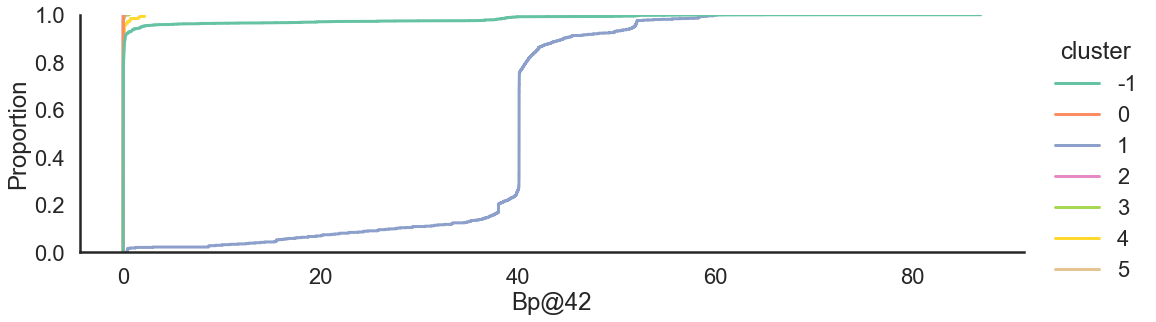

In [133]:
sns.displot(data=udf, #.loc[udf.cluster2>=0], 
            x='Bp@42', hue='cluster', palette='Set2', 
            aspect=3, kind='ecdf')

In [80]:

mdf2 = pd.merge(mdf2, udf[['run_id', 'cluster', 'cluster2']], on='run_id', )

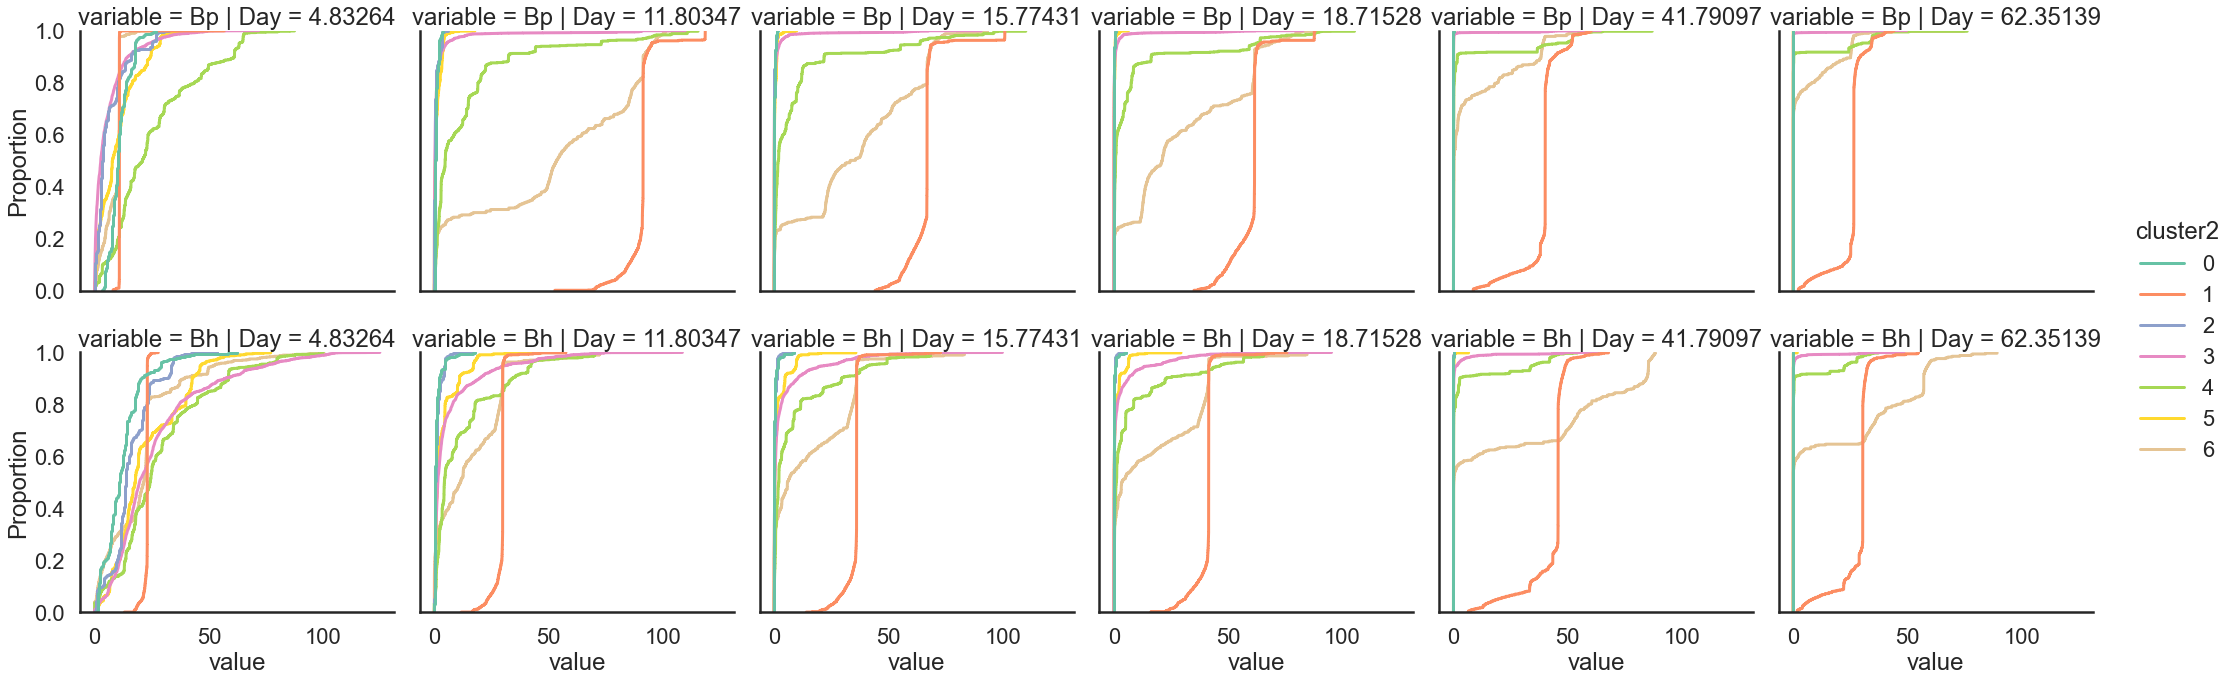

In [81]:

sns.displot(data=mdf2.loc[mdf2.Day.round(0).isin(sample_days) & mdf2.variable.isin(['Bp', 'Bh'])], 
            x='value', col='Day', palette='Set2', row='variable',
            aspect=1,
            kind='ecdf', hue='cluster2'
           )

In [ ]:
sns.displot(data=udf, #.loc[udf.cluster2>=0], 
            x='Bp@42', hue='cluster', palette='Set2', 
            aspect=1,
            kind='ecdf', col='cluster'
           )

In [ ]:
sns.displot(data=udf, #.loc[udf.cluster2>=0], 
            x='error', hue='cluster2', palette='fire', 
            aspect=3, kind='ecdf')

In [ ]:
cols_to_lookat = ['M_h', 'M_p', 'gamma^D_p', 'gamma^D_h', 
       'E^O_p', 'E^I_h', 
       'Vmax^IN_p',  'Vmax^IC_p', 'Vmax^ON_h', 'Vmax^IN_h',
       'Vmax^OC_h',  'epsilon', 'VTmax', 'omega']

In [ ]:
for c in cols_to_lookat:
    sns.displot(data=udf.loc[udf.cluster>=0], 
                x=c, hue='cluster', palette=cpalette[1:], kind='hist', element='step', multiple='stack', col='cluster' )

In [ ]:
sns.set_context('talk')
cpalette=[(0.9,0.9,0.9),] +sns.color_palette('deep', clusterer.labels_.max()+1)

sns.relplot(data=udf, x='UMAP1', y='UMAP2', hue='cluster', s=5, 
            height=10, aspect=1, palette=cpalette, #size='error',
            legend='full')

In [95]:
sum_df2.to_csv('cluster_assignment.csv.gz')